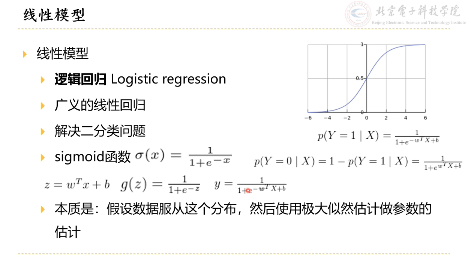

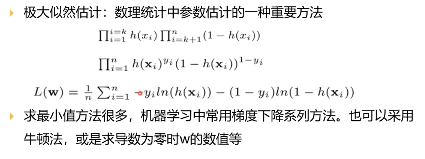

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000,tol=1e-4):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.tol = tol
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _binary_crossentropy(self, y_true, y_pred):
        # 二分类交叉熵损失函数
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        """
        训练逻辑回归模型
        
        参数:
        X -- 特征矩阵，形状为 (n_samples, n_features)
        y -- 目标标签，形状为 (n_samples,)
        """
        n_samples, n_features = X.shape

        # 初始化权重
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 梯度下降
        for i in range(self.n_iter):
            # 计算预测值
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

            # 计算损失
            loss = self._binary_crossentropy(y, y_pred)
            self.loss_history.append(loss)

            # 计算梯度
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # 更新权重
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # 停止条件
            #if i > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
            #    break

            if i % 100 == 0:
                print(f"Iteration {i}: loss = {loss}")

    def predict_proba(self, X):
        """
        预测样本属于正样本的概率
        
        参数:
        X -- 特征矩阵，形状为 (n_samples, n_features)
        
        返回:
        y_pred -- 预测概率，形状为 (n_samples,)
        """
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        return y_pred

    def predict(self, X, threshold=0.5):
        """
        预测样本属于正样本的概率
        
        参数:
        X -- 特征矩阵，形状为 (n_samples, n_features)
        
        返回:
        y_pred -- 预测标签，形状为 (n_samples,)
        """
        proba  = self.predict_proba(X)
        return (proba >= threshold).astype(int)



In [10]:
# 生成示例数据
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 创建二分类数据集
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 创建逻辑回归模型
model = LogisticRegression(n_iter=10000)
model.fit(X_train, y_train)

# 预测测试集
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
# 评估模型
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on test set:", accuracy)

print("Accuracy on train set:", accuracy_score(y_train, y_pred_train))

Iteration 0: loss = 0.6931471805599452
Iteration 100: loss = 0.5180228965596485
Iteration 200: loss = 0.45175958718753395
Iteration 300: loss = 0.41678199686511525
Iteration 400: loss = 0.3949897971487982
Iteration 500: loss = 0.38009119597019664
Iteration 600: loss = 0.3692869502838186
Iteration 700: loss = 0.3611256818007407
Iteration 800: loss = 0.35477341700902715
Iteration 900: loss = 0.34971435789628513
Iteration 1000: loss = 0.34561134836095386
Iteration 1100: loss = 0.34223428313758597
Iteration 1200: loss = 0.33942058049849666
Iteration 1300: loss = 0.33705205205593103
Iteration 1400: loss = 0.3350407126459025
Iteration 1500: loss = 0.3333197264770726
Iteration 1600: loss = 0.3318374357495922
Iteration 1700: loss = 0.330553308847539
Iteration 1800: loss = 0.32943512250640283
Iteration 1900: loss = 0.3284569594412898
Iteration 2000: loss = 0.32759775809559066
Iteration 2100: loss = 0.3268402443295028
Iteration 2200: loss = 0.32617013243625204
Iteration 2300: loss = 0.3255755193

In [5]:
from sklearn import linear_model

skModel = linear_model.LogisticRegression()
skModel.fit(X_train, y_train)

y_pred = skModel.predict(X_test)
y_pred_train = skModel.predict(X_train)

print("Accuracy:", skModel.score(X_test, y_test))
print("Train Accuracy:", skModel.score(X_train, y_train))


Accuracy: 0.83
Train Accuracy: 0.87


In [17]:
# 鸢尾花数据集测试
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("训练集准确率:", accuracy_train)
print("测试集准确率:", accuracy)

训练集准确率: 0.9619047619047619
测试集准确率: 1.0


In [15]:
print(y_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
